# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-12 21:26:51--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-12 21:26:51--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [31]:
# Resumen del conjunto de datos
print("informacion general del DataFram:")
data.info()

print("\nEstadisticas descriptivas del DataFrame:")
display(data.describe(include="all"))

# Contar la cantidad de tweets por etiqueta
print("\nCantidad de tweets por etiqueta:")
label_counts = data['Label'].value_counts()
display(label_counts)

# Proporción de tweets por etiqueta

print("\nProporcion de tweets por etiqueta:")
display(label_counts / len(data))

informacion general del DataFram:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Contents          1914 non-null   object
 1   Label             1914 non-null   object
 2   cleaned_contents  1914 non-null   object
dtypes: object(3)
memory usage: 45.0+ KB

Estadisticas descriptivas del DataFrame:


,Contents,Label,cleaned_contents
count,1914,1914,1914
unique,1914,2,1913
top,"vamos @arvenlol, dales duro como tú sabes #lo...",non-biased,"[tan, dispersa, darte, cuenta, q, ganas, hacer..."
freq,1,1596,2



Cantidad de tweets por etiqueta:


,count
Label,
non-biased,1596
biased,318



Proporcion de tweets por etiqueta:


,count
Label,
non-biased,0.833856
biased,0.166144


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

El 83.38 % de los tweets son “non-biased” y el 16.61 % son “biased”

Esta diferencia es importante porque el conjunto está desbalanceado ya que hay muchos más tweets sin sesgo. Eso puede hacer que un modelo aprenda a reconocer bien los “non-biased” pero falle al detectar los “biased”


## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [8]:
## Cree una funcion limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [14]:
data['cleaned_contents'] = data['Contents'].apply(limpiar_texto)
print(data[['Contents', 'cleaned_contents']].head())

                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                    cleaned_contents  
0  [chumeltorres, cabrón, tí, reciben, noticias, ...  
1  [alguien, tan, amable, ir, hacerme, compra, ma...  
2  [jenniferduquee, hahaha, si, rico, nadamas, fa...  
3  [evagelcot, ves, programa, favorito, sólo, enc...  
4  [siempre, tortilla, triunfa, mas, platos, play...  


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.


--- Top 10 Palabras en Tweets 'Biased' ---
si: 30
mujer: 23
mujeres: 19
ser: 17
así: 16
quiero: 14
q: 14
mejor: 13
mamá: 12
tan: 12

--- Top 10 Palabras en Tweets 'Non-Biased' ---
si: 167
gracias: 90
bien: 69
año: 65
quiero: 62
hoy: 62
día: 62
mejor: 62
tan: 59
días: 58


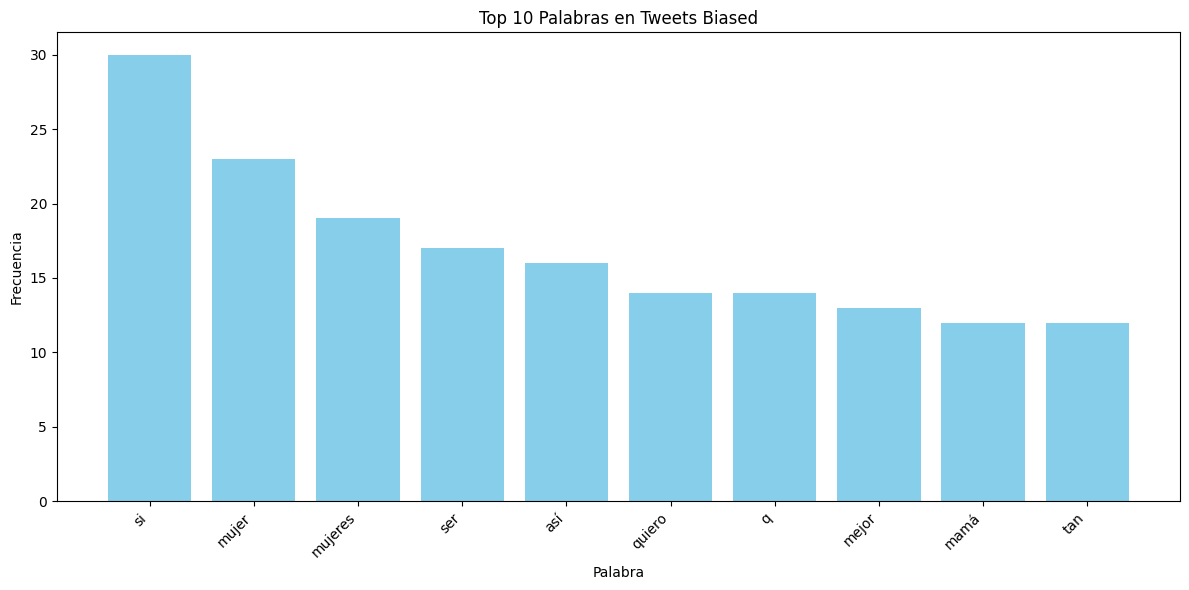

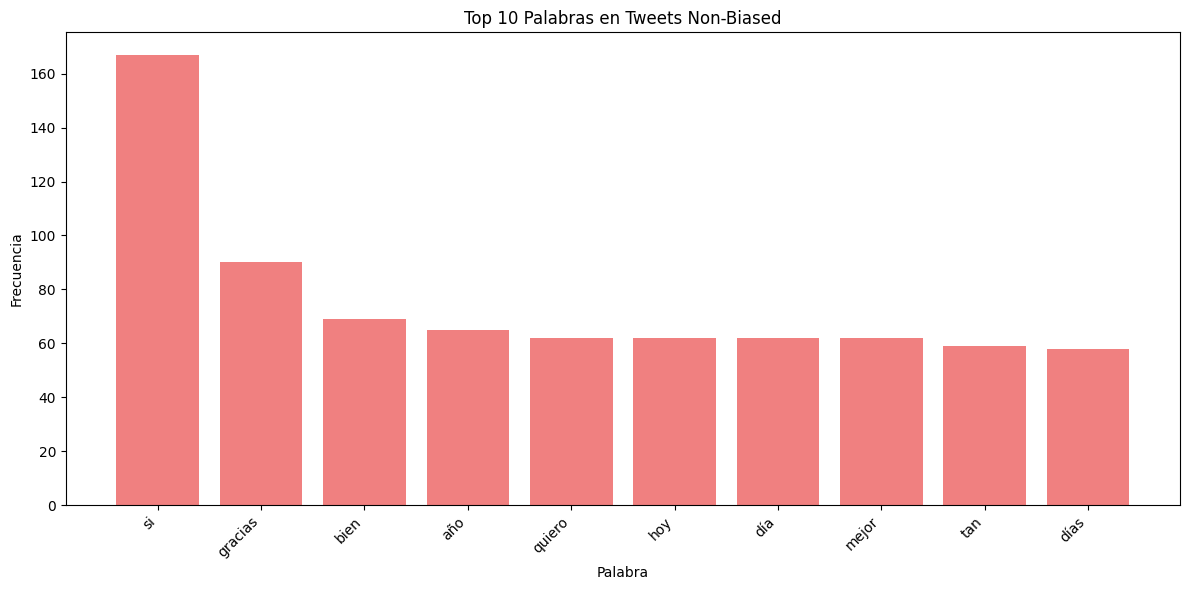

In [15]:
# Separar los datos por etiqueta
biased_data = data[data['Label'] == 'biased']
non_biased_data = data[data['Label'] == 'non-biased']

# Aplanar la lista de listas de palabras para cada etiqueta
all_biased_words = [word for sublist in biased_data['cleaned_contents'] for word in sublist]
all_non_biased_words = [word for sublist in non_biased_data['cleaned_contents'] for word in sublist]

# Contar palabras para cada etiqueta
biased_word_counts = Counter(all_biased_words)
non_biased_word_counts = Counter(all_non_biased_words)

# Mostrar las 10 palabras más comunes en tweets 'biased'
print("\n--- Top 10 Palabras en Tweets 'Biased' ---")
for word, count in biased_word_counts.most_common(10):
    print(f"{word}: {count}")

# Mostrar las 10 palabras más comunes en tweets 'non-biased'
print("\n--- Top 10 Palabras en Tweets 'Non-Biased' ---")
for word, count in non_biased_word_counts.most_common(10):
    print(f"{word}: {count}")

# --- Visualización de Frecuencia de Palabras ---

# Preparar datos para graficar (Top 10 palabras biased)
top_biased_words = biased_word_counts.most_common(10)
words_b = [item[0] for item in top_biased_words]
counts_b = [item[1] for item in top_biased_words]

plt.figure(figsize=(12, 6))
plt.bar(words_b, counts_b, color='skyblue')
plt.title('Top 10 Palabras en Tweets Biased')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Preparar datos para graficar (Top 10 palabras non-biased)
top_non_biased_words = non_biased_word_counts.most_common(10)
words_nb = [item[0] for item in top_non_biased_words]
counts_nb = [item[1] for item in top_non_biased_words]

plt.figure(figsize=(12, 6))
plt.bar(words_nb, counts_nb, color='lightcoral')
plt.title('Top 10 Palabras en Tweets Non-Biased')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?

    En los tweets biased las palabras mas comunes son “mujer”, “mujeres” y “mamá”, que no aparecen tanto en los tweets “non-biased”, donde se usan más términos como “gracias”, “bien” o “día”.

- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?

    Si, palabras como “mujer”, “mujeres” y “mamá” podrían reflejar temas relacionados con géneroo tal vez a los roles sociales que estas desempeñan

- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

    Las empresas pueden aprovechar esta información para entender qué temas generan opiniones más cargadas o polarizadas, y así mejorar su comunicación, evitar malentendidos y conectar de forma más empática con su público

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [23]:
def generar_nube_palabras(word_counts, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

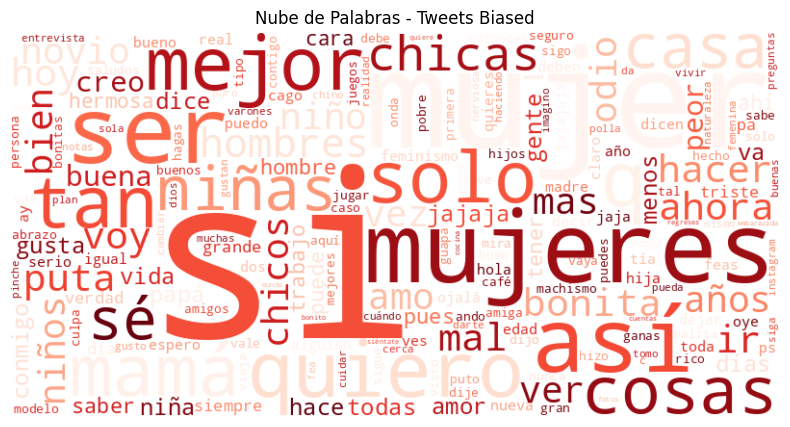

In [24]:
# Generar nube de palabras para cada conjunto
generar_nube_palabras(biased_word_counts, 'Nube de Palabras - Tweets Biased', 'Reds')


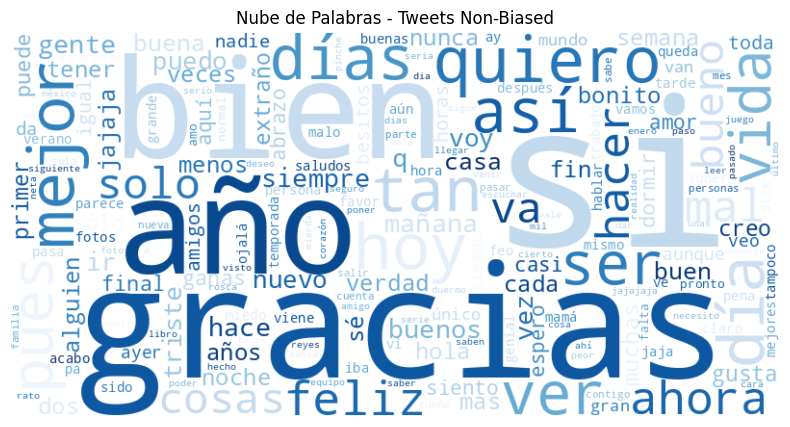

In [25]:
# NO biased nube de palabras
generar_nube_palabras(non_biased_word_counts, 'Nube de Palabras - Tweets Non-Biased', 'Blues')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?

  Al entender qué temas generan sesgos o reacciones fuertes, la marca puede ajustar su tono, elegir mejor las palabras y enfocarse en mensajes más neutrales o positivos que conecten mejor con el público.

- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?

  Si los tweets son mayormente “biased”, la empresa podría revisar el contenido de la campaña, detectar posibles temas sensibles y adaptar el mensaje para evitar malinterpretaciones o polémicas. También puede aprovechar esa información para responder con empatía y reforzar su imagen de marca.

- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

  Se podrían explorar tendencias a lo largo del tiempo (por ejemplo, cómo cambian las opiniones en torno a ciertos temas), diferencias por región o grupo demográfico, o incluso la relación entre sentimiento y engagement (likes, retweets, etc.). Esto ayudaría a anticipar reacciones y planificar estrategias de comunicación más efectivas.